# Credit Card Lead Prediction
--------------
## Problem Statement

Happy Customer Bank is a mid-sized private bank that deals in all kinds of banking products, like Savings accounts, Current accounts, investment products, credit products, among other offerings. The bank also cross-sells products to its existing customers and to do so they use different kinds of communication like tele-calling, e-mails, recommendations on net banking, mobile banking, etc. In this case, the Happy Customer Bank wants to cross sell its credit cards to its existing customers. The bank has identified a set of customers that are eligible for taking these credit cards.

Now, the bank is looking for your help in identifying customers that could show higher intent towards a recommended credit card, given:
* Customer details (gender, age, region etc.)
* Details of his/her relationship with the bank (Channel_Code,Vintage, 'Avg_Asset_Value etc.)

**Link:** https://datahack.analyticsvidhya.com/contest/job-a-thon-2/?utm_source=sendinblue&utm_campaign=JobAThon__Now_Live__Registrations__05282021&utm_medium=email#LeaderBoard

## Evaluation
The evaluation metric for this competition is `roc_auc_score` across all entries in the test set.

In [87]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [88]:
train_df = pd.read_csv('data/train_s3TEQDk.csv')
test_df = pd.read_csv('data/test_mSzZ8RL.csv')

test_df_ID = test_df['ID']
train_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [89]:
# Dropping the ID column
train_df.drop('ID', axis=1, inplace=True)
test_df.drop('ID', axis=1, inplace=True)

In [90]:
train_df['Credit_Product'] = train_df['Credit_Product'].fillna(train_df['Credit_Product'].mode()[0])
test_df['Credit_Product'] = test_df['Credit_Product'].fillna(test_df['Credit_Product'].mode()[0])

In [91]:
X = train_df.drop(['Is_Lead'], axis=1)
y = train_df['Is_Lead']

In [92]:
categorical_cols = []
numerical_cols = []

for label, content in X.items():
    if pd.api.types.is_string_dtype(content):
        categorical_cols.append(label)
    else:
        numerical_cols.append(label)

In [93]:
test_df_copy = test_df.copy()

In [94]:
label_encoder = LabelEncoder()
minmax_scaler = MinMaxScaler()


for col in categorical_cols:
    label_encoder_fit = label_encoder.fit(X[col])
    X[col] = label_encoder_fit.transform(X[col])
    test_df[col] = label_encoder_fit.transform(test_df[col])

minmax_scaler_fit = minmax_scaler.fit(X[numerical_cols])
minmax_scaler_tra = minmax_scaler_fit.transform(X[numerical_cols])
minmax_scaler_tra_ = minmax_scaler_fit.transform(test_df[numerical_cols])

In [95]:
def _model_experimentation(models, X, y):
    '''
    Fit and Score the deep learning models without performing hyperparameter tuning
    '''
    train_scores = {}
    for name, model in models.items():
        train_scores[name] = np.mean(cross_val_score(model, X, y, cv=5, scoring='roc_auc'))
    return train_scores

In [96]:
deep_models = {'XGB': xgb.XGBClassifier(n_jobs=-1, eval_metric='auc'),
               'CAT': CatBoostClassifier(),
               'RF': RandomForestClassifier(n_jobs=-1),
               'LOG': LogisticRegression()
              }

In [97]:
# train_scores = _model_experimentation(deep_models, X, y)
# train_scores

In [98]:
# i = 0
# for name, model in deep_models.items():
#     model.fit(X, y)
#     model_predict = model.predict(test_df)
#     submission = pd.DataFrame()
#     submission['ID'] = test_df_ID
#     submission['Is_Lead'] = model_predict
#     submission.to_csv('submission_'+name+"_"+str(i)+".csv", index=False)
#     i = i + 1

In [99]:
# class count
class_count_0, class_count_1 = train_df['Is_Lead'].value_counts()

# Separate class
class_0 = train_df[train_df['Is_Lead'] == 0]
class_1 = train_df[train_df['Is_Lead'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (187437, 10)
class 1: (58288, 10)


In [100]:
class_0_under = class_0.sample(class_count_1)

In [101]:
new_df = pd.concat([class_0_under, class_1])
new_df = new_df.sample(frac=1)

In [102]:
new_df['Is_Lead'].value_counts()

1    58288
0    58288
Name: Is_Lead, dtype: int64

In [103]:
X_ = new_df.drop(['Is_Lead'], axis=1)
y_ = new_df['Is_Lead']

In [104]:
X_

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
79111,Female,43,RG283,Salaried,X3,56,No,852219,Yes
204395,Female,64,RG268,Salaried,X1,69,No,1350672,No
25491,Male,51,RG277,Self_Employed,X2,44,Yes,768871,No
80734,Male,59,RG268,Self_Employed,X2,62,No,1095652,Yes
116374,Female,46,RG279,Self_Employed,X3,51,No,798570,No
...,...,...,...,...,...,...,...,...,...
171628,Male,52,RG284,Self_Employed,X1,31,No,2393708,No
36411,Male,42,RG269,Self_Employed,X3,14,Yes,374957,Yes
153872,Female,38,RG270,Self_Employed,X1,14,No,680992,No
35159,Male,67,RG254,Other,X3,123,Yes,1463391,Yes


In [105]:
label_encoder = LabelEncoder()
minmax_scaler = MinMaxScaler()

for col in categorical_cols:
    label_encoder_fit = label_encoder.fit(X_[col])
    X_[col] = label_encoder_fit.transform(X_[col])
    test_df_copy[col] = label_encoder_fit.transform(test_df_copy[col])
    
minmax_scaler_fit = minmax_scaler.fit(X_[numerical_cols])
X_[numerical_cols] = minmax_scaler_fit.transform(X_[numerical_cols])
test_df_copy[numerical_cols] = minmax_scaler_fit.transform(test_df_copy[numerical_cols])

In [106]:
train_scores_ = _model_experimentation(deep_models, X_, y_)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of lab

Learning rate set to 0.071449
0:	learn: 0.6781941	total: 16.5ms	remaining: 16.4s
1:	learn: 0.6647183	total: 31.7ms	remaining: 15.8s
2:	learn: 0.6481186	total: 45.6ms	remaining: 15.2s
3:	learn: 0.6383482	total: 60.3ms	remaining: 15s
4:	learn: 0.6297170	total: 75.9ms	remaining: 15.1s
5:	learn: 0.6225017	total: 91.6ms	remaining: 15.2s
6:	learn: 0.6134945	total: 107ms	remaining: 15.2s
7:	learn: 0.6081839	total: 122ms	remaining: 15.1s
8:	learn: 0.6034926	total: 135ms	remaining: 14.9s
9:	learn: 0.5975361	total: 150ms	remaining: 14.8s
10:	learn: 0.5940293	total: 165ms	remaining: 14.8s
11:	learn: 0.5893626	total: 180ms	remaining: 14.8s
12:	learn: 0.5869284	total: 200ms	remaining: 15.2s
13:	learn: 0.5845824	total: 216ms	remaining: 15.2s
14:	learn: 0.5826666	total: 229ms	remaining: 15s
15:	learn: 0.5803701	total: 244ms	remaining: 15s
16:	learn: 0.5783833	total: 259ms	remaining: 15s
17:	learn: 0.5766354	total: 274ms	remaining: 15s
18:	learn: 0.5754357	total: 290ms	remaining: 15s
19:	learn: 0.5741

160:	learn: 0.5489527	total: 2.39s	remaining: 12.5s
161:	learn: 0.5487694	total: 2.41s	remaining: 12.5s
162:	learn: 0.5487301	total: 2.42s	remaining: 12.5s
163:	learn: 0.5486917	total: 2.44s	remaining: 12.4s
164:	learn: 0.5486420	total: 2.46s	remaining: 12.4s
165:	learn: 0.5486051	total: 2.47s	remaining: 12.4s
166:	learn: 0.5485698	total: 2.49s	remaining: 12.4s
167:	learn: 0.5485326	total: 2.5s	remaining: 12.4s
168:	learn: 0.5484771	total: 2.52s	remaining: 12.4s
169:	learn: 0.5484013	total: 2.53s	remaining: 12.4s
170:	learn: 0.5483405	total: 2.55s	remaining: 12.4s
171:	learn: 0.5483008	total: 2.56s	remaining: 12.4s
172:	learn: 0.5482337	total: 2.58s	remaining: 12.3s
173:	learn: 0.5481971	total: 2.6s	remaining: 12.3s
174:	learn: 0.5481360	total: 2.61s	remaining: 12.3s
175:	learn: 0.5480823	total: 2.63s	remaining: 12.3s
176:	learn: 0.5480309	total: 2.64s	remaining: 12.3s
177:	learn: 0.5479854	total: 2.66s	remaining: 12.3s
178:	learn: 0.5479346	total: 2.67s	remaining: 12.3s
179:	learn: 0.

319:	learn: 0.5415095	total: 4.95s	remaining: 10.5s
320:	learn: 0.5414684	total: 4.97s	remaining: 10.5s
321:	learn: 0.5414247	total: 4.99s	remaining: 10.5s
322:	learn: 0.5413792	total: 5s	remaining: 10.5s
323:	learn: 0.5413460	total: 5.02s	remaining: 10.5s
324:	learn: 0.5412943	total: 5.03s	remaining: 10.5s
325:	learn: 0.5412570	total: 5.05s	remaining: 10.4s
326:	learn: 0.5411944	total: 5.07s	remaining: 10.4s
327:	learn: 0.5411570	total: 5.08s	remaining: 10.4s
328:	learn: 0.5411082	total: 5.1s	remaining: 10.4s
329:	learn: 0.5410677	total: 5.11s	remaining: 10.4s
330:	learn: 0.5410362	total: 5.13s	remaining: 10.4s
331:	learn: 0.5409997	total: 5.15s	remaining: 10.4s
332:	learn: 0.5409727	total: 5.17s	remaining: 10.3s
333:	learn: 0.5409403	total: 5.18s	remaining: 10.3s
334:	learn: 0.5409198	total: 5.2s	remaining: 10.3s
335:	learn: 0.5408871	total: 5.21s	remaining: 10.3s
336:	learn: 0.5408576	total: 5.23s	remaining: 10.3s
337:	learn: 0.5408050	total: 5.25s	remaining: 10.3s
338:	learn: 0.540

478:	learn: 0.5359301	total: 7.55s	remaining: 8.21s
479:	learn: 0.5359105	total: 7.56s	remaining: 8.2s
480:	learn: 0.5358698	total: 7.58s	remaining: 8.18s
481:	learn: 0.5358301	total: 7.6s	remaining: 8.16s
482:	learn: 0.5358020	total: 7.61s	remaining: 8.15s
483:	learn: 0.5357644	total: 7.63s	remaining: 8.13s
484:	learn: 0.5357476	total: 7.65s	remaining: 8.12s
485:	learn: 0.5357133	total: 7.66s	remaining: 8.1s
486:	learn: 0.5356799	total: 7.68s	remaining: 8.09s
487:	learn: 0.5356452	total: 7.69s	remaining: 8.07s
488:	learn: 0.5356156	total: 7.71s	remaining: 8.06s
489:	learn: 0.5355969	total: 7.72s	remaining: 8.04s
490:	learn: 0.5355601	total: 7.74s	remaining: 8.03s
491:	learn: 0.5355233	total: 7.76s	remaining: 8.01s
492:	learn: 0.5354874	total: 7.77s	remaining: 7.99s
493:	learn: 0.5354558	total: 7.79s	remaining: 7.98s
494:	learn: 0.5354315	total: 7.8s	remaining: 7.96s
495:	learn: 0.5353891	total: 7.82s	remaining: 7.94s
496:	learn: 0.5353473	total: 7.83s	remaining: 7.93s
497:	learn: 0.53

639:	learn: 0.5310601	total: 10.2s	remaining: 5.71s
640:	learn: 0.5310263	total: 10.2s	remaining: 5.69s
641:	learn: 0.5310013	total: 10.2s	remaining: 5.68s
642:	learn: 0.5309731	total: 10.2s	remaining: 5.66s
643:	learn: 0.5309546	total: 10.2s	remaining: 5.65s
644:	learn: 0.5309349	total: 10.2s	remaining: 5.63s
645:	learn: 0.5309030	total: 10.2s	remaining: 5.62s
646:	learn: 0.5308546	total: 10.3s	remaining: 5.6s
647:	learn: 0.5308257	total: 10.3s	remaining: 5.58s
648:	learn: 0.5307937	total: 10.3s	remaining: 5.57s
649:	learn: 0.5307665	total: 10.3s	remaining: 5.55s
650:	learn: 0.5307338	total: 10.3s	remaining: 5.54s
651:	learn: 0.5307143	total: 10.3s	remaining: 5.52s
652:	learn: 0.5306858	total: 10.4s	remaining: 5.5s
653:	learn: 0.5306659	total: 10.4s	remaining: 5.49s
654:	learn: 0.5306307	total: 10.4s	remaining: 5.47s
655:	learn: 0.5306019	total: 10.4s	remaining: 5.46s
656:	learn: 0.5305710	total: 10.4s	remaining: 5.44s
657:	learn: 0.5305502	total: 10.4s	remaining: 5.42s
658:	learn: 0.

800:	learn: 0.5266122	total: 12.7s	remaining: 3.16s
801:	learn: 0.5265765	total: 12.7s	remaining: 3.15s
802:	learn: 0.5265474	total: 12.8s	remaining: 3.13s
803:	learn: 0.5265292	total: 12.8s	remaining: 3.11s
804:	learn: 0.5265027	total: 12.8s	remaining: 3.1s
805:	learn: 0.5264836	total: 12.8s	remaining: 3.08s
806:	learn: 0.5264532	total: 12.8s	remaining: 3.06s
807:	learn: 0.5264231	total: 12.8s	remaining: 3.05s
808:	learn: 0.5263859	total: 12.8s	remaining: 3.03s
809:	learn: 0.5263538	total: 12.9s	remaining: 3.02s
810:	learn: 0.5263472	total: 12.9s	remaining: 3s
811:	learn: 0.5263195	total: 12.9s	remaining: 2.98s
812:	learn: 0.5262870	total: 12.9s	remaining: 2.97s
813:	learn: 0.5262519	total: 12.9s	remaining: 2.96s
814:	learn: 0.5262142	total: 12.9s	remaining: 2.94s
815:	learn: 0.5261782	total: 13s	remaining: 2.92s
816:	learn: 0.5261524	total: 13s	remaining: 2.91s
817:	learn: 0.5261316	total: 13s	remaining: 2.89s
818:	learn: 0.5261094	total: 13s	remaining: 2.88s
819:	learn: 0.5260882	to

968:	learn: 0.5222460	total: 15.5s	remaining: 495ms
969:	learn: 0.5222360	total: 15.5s	remaining: 479ms
970:	learn: 0.5222074	total: 15.5s	remaining: 463ms
971:	learn: 0.5221746	total: 15.5s	remaining: 447ms
972:	learn: 0.5221447	total: 15.5s	remaining: 431ms
973:	learn: 0.5221248	total: 15.6s	remaining: 415ms
974:	learn: 0.5221129	total: 15.6s	remaining: 399ms
975:	learn: 0.5220870	total: 15.6s	remaining: 383ms
976:	learn: 0.5220608	total: 15.6s	remaining: 367ms
977:	learn: 0.5220400	total: 15.6s	remaining: 351ms
978:	learn: 0.5220132	total: 15.6s	remaining: 336ms
979:	learn: 0.5219933	total: 15.7s	remaining: 320ms
980:	learn: 0.5219585	total: 15.7s	remaining: 304ms
981:	learn: 0.5219411	total: 15.7s	remaining: 288ms
982:	learn: 0.5219263	total: 15.7s	remaining: 272ms
983:	learn: 0.5219053	total: 15.7s	remaining: 256ms
984:	learn: 0.5218795	total: 15.7s	remaining: 240ms
985:	learn: 0.5218513	total: 15.8s	remaining: 224ms
986:	learn: 0.5218351	total: 15.8s	remaining: 208ms
987:	learn: 

131:	learn: 0.5494525	total: 2.02s	remaining: 13.3s
132:	learn: 0.5494109	total: 2.04s	remaining: 13.3s
133:	learn: 0.5492093	total: 2.05s	remaining: 13.3s
134:	learn: 0.5491371	total: 2.07s	remaining: 13.3s
135:	learn: 0.5490935	total: 2.08s	remaining: 13.2s
136:	learn: 0.5490341	total: 2.1s	remaining: 13.2s
137:	learn: 0.5489798	total: 2.11s	remaining: 13.2s
138:	learn: 0.5489241	total: 2.13s	remaining: 13.2s
139:	learn: 0.5488900	total: 2.15s	remaining: 13.2s
140:	learn: 0.5488364	total: 2.16s	remaining: 13.2s
141:	learn: 0.5487712	total: 2.17s	remaining: 13.1s
142:	learn: 0.5487336	total: 2.19s	remaining: 13.1s
143:	learn: 0.5486892	total: 2.21s	remaining: 13.1s
144:	learn: 0.5486339	total: 2.23s	remaining: 13.1s
145:	learn: 0.5485857	total: 2.24s	remaining: 13.1s
146:	learn: 0.5485583	total: 2.26s	remaining: 13.1s
147:	learn: 0.5484894	total: 2.27s	remaining: 13.1s
148:	learn: 0.5484412	total: 2.29s	remaining: 13.1s
149:	learn: 0.5483096	total: 2.3s	remaining: 13.1s
150:	learn: 0.

291:	learn: 0.5413436	total: 4.58s	remaining: 11.1s
292:	learn: 0.5412968	total: 4.59s	remaining: 11.1s
293:	learn: 0.5412568	total: 4.61s	remaining: 11.1s
294:	learn: 0.5412277	total: 4.62s	remaining: 11s
295:	learn: 0.5411832	total: 4.64s	remaining: 11s
296:	learn: 0.5411411	total: 4.65s	remaining: 11s
297:	learn: 0.5411029	total: 4.67s	remaining: 11s
298:	learn: 0.5410625	total: 4.68s	remaining: 11s
299:	learn: 0.5410236	total: 4.7s	remaining: 11s
300:	learn: 0.5409677	total: 4.72s	remaining: 11s
301:	learn: 0.5409256	total: 4.73s	remaining: 10.9s
302:	learn: 0.5408898	total: 4.75s	remaining: 10.9s
303:	learn: 0.5408481	total: 4.77s	remaining: 10.9s
304:	learn: 0.5407989	total: 4.78s	remaining: 10.9s
305:	learn: 0.5407759	total: 4.8s	remaining: 10.9s
306:	learn: 0.5407583	total: 4.81s	remaining: 10.9s
307:	learn: 0.5407208	total: 4.83s	remaining: 10.9s
308:	learn: 0.5406667	total: 4.85s	remaining: 10.8s
309:	learn: 0.5406302	total: 4.86s	remaining: 10.8s
310:	learn: 0.5405913	total:

452:	learn: 0.5355757	total: 7.14s	remaining: 8.62s
453:	learn: 0.5355297	total: 7.15s	remaining: 8.6s
454:	learn: 0.5354977	total: 7.17s	remaining: 8.59s
455:	learn: 0.5354500	total: 7.19s	remaining: 8.57s
456:	learn: 0.5354230	total: 7.2s	remaining: 8.56s
457:	learn: 0.5353804	total: 7.22s	remaining: 8.54s
458:	learn: 0.5353386	total: 7.24s	remaining: 8.53s
459:	learn: 0.5352927	total: 7.25s	remaining: 8.52s
460:	learn: 0.5352430	total: 7.27s	remaining: 8.5s
461:	learn: 0.5352175	total: 7.29s	remaining: 8.48s
462:	learn: 0.5351878	total: 7.3s	remaining: 8.47s
463:	learn: 0.5351586	total: 7.32s	remaining: 8.45s
464:	learn: 0.5351168	total: 7.34s	remaining: 8.44s
465:	learn: 0.5350799	total: 7.35s	remaining: 8.43s
466:	learn: 0.5350530	total: 7.37s	remaining: 8.41s
467:	learn: 0.5350035	total: 7.39s	remaining: 8.4s
468:	learn: 0.5349765	total: 7.4s	remaining: 8.38s
469:	learn: 0.5349545	total: 7.42s	remaining: 8.37s
470:	learn: 0.5349169	total: 7.43s	remaining: 8.35s
471:	learn: 0.5348

613:	learn: 0.5304549	total: 9.69s	remaining: 6.09s
614:	learn: 0.5304133	total: 9.71s	remaining: 6.08s
615:	learn: 0.5303892	total: 9.72s	remaining: 6.06s
616:	learn: 0.5303636	total: 9.74s	remaining: 6.04s
617:	learn: 0.5303287	total: 9.76s	remaining: 6.03s
618:	learn: 0.5303071	total: 9.77s	remaining: 6.01s
619:	learn: 0.5302844	total: 9.79s	remaining: 6s
620:	learn: 0.5302695	total: 9.8s	remaining: 5.98s
621:	learn: 0.5302374	total: 9.82s	remaining: 5.96s
622:	learn: 0.5302071	total: 9.83s	remaining: 5.95s
623:	learn: 0.5301748	total: 9.85s	remaining: 5.93s
624:	learn: 0.5301448	total: 9.86s	remaining: 5.92s
625:	learn: 0.5301295	total: 9.88s	remaining: 5.9s
626:	learn: 0.5301065	total: 9.9s	remaining: 5.89s
627:	learn: 0.5300778	total: 9.91s	remaining: 5.87s
628:	learn: 0.5300580	total: 9.93s	remaining: 5.85s
629:	learn: 0.5300418	total: 9.94s	remaining: 5.84s
630:	learn: 0.5300082	total: 9.96s	remaining: 5.82s
631:	learn: 0.5299917	total: 9.97s	remaining: 5.8s
632:	learn: 0.52996

775:	learn: 0.5259199	total: 12.3s	remaining: 3.54s
776:	learn: 0.5259042	total: 12.3s	remaining: 3.53s
777:	learn: 0.5258804	total: 12.3s	remaining: 3.51s
778:	learn: 0.5258558	total: 12.3s	remaining: 3.5s
779:	learn: 0.5258314	total: 12.3s	remaining: 3.48s
780:	learn: 0.5258160	total: 12.4s	remaining: 3.46s
781:	learn: 0.5257854	total: 12.4s	remaining: 3.45s
782:	learn: 0.5257599	total: 12.4s	remaining: 3.43s
783:	learn: 0.5257378	total: 12.4s	remaining: 3.42s
784:	learn: 0.5257116	total: 12.4s	remaining: 3.4s
785:	learn: 0.5256884	total: 12.4s	remaining: 3.38s
786:	learn: 0.5256631	total: 12.4s	remaining: 3.37s
787:	learn: 0.5256285	total: 12.5s	remaining: 3.35s
788:	learn: 0.5256043	total: 12.5s	remaining: 3.34s
789:	learn: 0.5255801	total: 12.5s	remaining: 3.32s
790:	learn: 0.5255437	total: 12.5s	remaining: 3.31s
791:	learn: 0.5255070	total: 12.5s	remaining: 3.29s
792:	learn: 0.5254703	total: 12.5s	remaining: 3.27s
793:	learn: 0.5254490	total: 12.6s	remaining: 3.26s
794:	learn: 0.

935:	learn: 0.5219071	total: 14.8s	remaining: 1.01s
936:	learn: 0.5218822	total: 14.9s	remaining: 999ms
937:	learn: 0.5218578	total: 14.9s	remaining: 983ms
938:	learn: 0.5218399	total: 14.9s	remaining: 967ms
939:	learn: 0.5218052	total: 14.9s	remaining: 951ms
940:	learn: 0.5217646	total: 14.9s	remaining: 935ms
941:	learn: 0.5217344	total: 14.9s	remaining: 919ms
942:	learn: 0.5217105	total: 14.9s	remaining: 903ms
943:	learn: 0.5216751	total: 15s	remaining: 888ms
944:	learn: 0.5216376	total: 15s	remaining: 872ms
945:	learn: 0.5216131	total: 15s	remaining: 856ms
946:	learn: 0.5216014	total: 15s	remaining: 840ms
947:	learn: 0.5215710	total: 15s	remaining: 824ms
948:	learn: 0.5215519	total: 15s	remaining: 808ms
949:	learn: 0.5215268	total: 15.1s	remaining: 793ms
950:	learn: 0.5214927	total: 15.1s	remaining: 777ms
951:	learn: 0.5214750	total: 15.1s	remaining: 761ms
952:	learn: 0.5214550	total: 15.1s	remaining: 745ms
953:	learn: 0.5214319	total: 15.1s	remaining: 729ms
954:	learn: 0.5214017	to

105:	learn: 0.5513494	total: 1.65s	remaining: 13.9s
106:	learn: 0.5512100	total: 1.67s	remaining: 13.9s
107:	learn: 0.5511523	total: 1.69s	remaining: 13.9s
108:	learn: 0.5511011	total: 1.7s	remaining: 13.9s
109:	learn: 0.5510601	total: 1.71s	remaining: 13.9s
110:	learn: 0.5509892	total: 1.73s	remaining: 13.9s
111:	learn: 0.5509130	total: 1.75s	remaining: 13.9s
112:	learn: 0.5508715	total: 1.76s	remaining: 13.8s
113:	learn: 0.5507964	total: 1.78s	remaining: 13.8s
114:	learn: 0.5507564	total: 1.79s	remaining: 13.8s
115:	learn: 0.5506456	total: 1.81s	remaining: 13.8s
116:	learn: 0.5505890	total: 1.83s	remaining: 13.8s
117:	learn: 0.5505287	total: 1.84s	remaining: 13.8s
118:	learn: 0.5504887	total: 1.86s	remaining: 13.8s
119:	learn: 0.5503945	total: 1.88s	remaining: 13.8s
120:	learn: 0.5503595	total: 1.89s	remaining: 13.7s
121:	learn: 0.5503079	total: 1.91s	remaining: 13.7s
122:	learn: 0.5501801	total: 1.92s	remaining: 13.7s
123:	learn: 0.5501380	total: 1.94s	remaining: 13.7s
124:	learn: 0

272:	learn: 0.5422957	total: 4.44s	remaining: 11.8s
273:	learn: 0.5422486	total: 4.45s	remaining: 11.8s
274:	learn: 0.5422217	total: 4.47s	remaining: 11.8s
275:	learn: 0.5421762	total: 4.49s	remaining: 11.8s
276:	learn: 0.5421392	total: 4.51s	remaining: 11.8s
277:	learn: 0.5420856	total: 4.53s	remaining: 11.8s
278:	learn: 0.5420436	total: 4.54s	remaining: 11.7s
279:	learn: 0.5419948	total: 4.56s	remaining: 11.7s
280:	learn: 0.5419412	total: 4.57s	remaining: 11.7s
281:	learn: 0.5418931	total: 4.59s	remaining: 11.7s
282:	learn: 0.5418404	total: 4.61s	remaining: 11.7s
283:	learn: 0.5418050	total: 4.62s	remaining: 11.7s
284:	learn: 0.5417817	total: 4.64s	remaining: 11.6s
285:	learn: 0.5417302	total: 4.65s	remaining: 11.6s
286:	learn: 0.5416865	total: 4.67s	remaining: 11.6s
287:	learn: 0.5416407	total: 4.68s	remaining: 11.6s
288:	learn: 0.5415904	total: 4.7s	remaining: 11.6s
289:	learn: 0.5415402	total: 4.72s	remaining: 11.5s
290:	learn: 0.5414919	total: 4.73s	remaining: 11.5s
291:	learn: 0

433:	learn: 0.5359285	total: 7.01s	remaining: 9.14s
434:	learn: 0.5358941	total: 7.03s	remaining: 9.13s
435:	learn: 0.5358676	total: 7.04s	remaining: 9.11s
436:	learn: 0.5358294	total: 7.06s	remaining: 9.09s
437:	learn: 0.5357807	total: 7.07s	remaining: 9.07s
438:	learn: 0.5357551	total: 7.09s	remaining: 9.06s
439:	learn: 0.5357177	total: 7.1s	remaining: 9.04s
440:	learn: 0.5356765	total: 7.12s	remaining: 9.02s
441:	learn: 0.5356339	total: 7.13s	remaining: 9.01s
442:	learn: 0.5355942	total: 7.15s	remaining: 8.99s
443:	learn: 0.5355651	total: 7.17s	remaining: 8.97s
444:	learn: 0.5355156	total: 7.18s	remaining: 8.96s
445:	learn: 0.5354894	total: 7.2s	remaining: 8.94s
446:	learn: 0.5354466	total: 7.21s	remaining: 8.93s
447:	learn: 0.5354152	total: 7.23s	remaining: 8.91s
448:	learn: 0.5353673	total: 7.25s	remaining: 8.89s
449:	learn: 0.5353315	total: 7.26s	remaining: 8.88s
450:	learn: 0.5352855	total: 7.28s	remaining: 8.86s
451:	learn: 0.5352492	total: 7.3s	remaining: 8.85s
452:	learn: 0.5

592:	learn: 0.5309252	total: 9.58s	remaining: 6.57s
593:	learn: 0.5308930	total: 9.59s	remaining: 6.56s
594:	learn: 0.5308560	total: 9.61s	remaining: 6.54s
595:	learn: 0.5308184	total: 9.63s	remaining: 6.53s
596:	learn: 0.5307944	total: 9.65s	remaining: 6.52s
597:	learn: 0.5307536	total: 9.67s	remaining: 6.5s
598:	learn: 0.5307247	total: 9.69s	remaining: 6.49s
599:	learn: 0.5306819	total: 9.71s	remaining: 6.47s
600:	learn: 0.5306416	total: 9.72s	remaining: 6.46s
601:	learn: 0.5306181	total: 9.74s	remaining: 6.44s
602:	learn: 0.5305854	total: 9.76s	remaining: 6.42s
603:	learn: 0.5305558	total: 9.78s	remaining: 6.41s
604:	learn: 0.5305210	total: 9.8s	remaining: 6.4s
605:	learn: 0.5304831	total: 9.81s	remaining: 6.38s
606:	learn: 0.5304574	total: 9.83s	remaining: 6.37s
607:	learn: 0.5304225	total: 9.85s	remaining: 6.35s
608:	learn: 0.5303995	total: 9.86s	remaining: 6.33s
609:	learn: 0.5303729	total: 9.88s	remaining: 6.32s
610:	learn: 0.5303482	total: 9.9s	remaining: 6.3s
611:	learn: 0.530

761:	learn: 0.5260334	total: 12.3s	remaining: 3.85s
762:	learn: 0.5260012	total: 12.4s	remaining: 3.84s
763:	learn: 0.5259770	total: 12.4s	remaining: 3.82s
764:	learn: 0.5259573	total: 12.4s	remaining: 3.81s
765:	learn: 0.5259285	total: 12.4s	remaining: 3.79s
766:	learn: 0.5259022	total: 12.4s	remaining: 3.77s
767:	learn: 0.5258868	total: 12.4s	remaining: 3.76s
768:	learn: 0.5258608	total: 12.5s	remaining: 3.74s
769:	learn: 0.5258381	total: 12.5s	remaining: 3.73s
770:	learn: 0.5257993	total: 12.5s	remaining: 3.71s
771:	learn: 0.5257781	total: 12.5s	remaining: 3.69s
772:	learn: 0.5257502	total: 12.5s	remaining: 3.67s
773:	learn: 0.5257355	total: 12.5s	remaining: 3.66s
774:	learn: 0.5257071	total: 12.5s	remaining: 3.64s
775:	learn: 0.5256744	total: 12.6s	remaining: 3.63s
776:	learn: 0.5256501	total: 12.6s	remaining: 3.61s
777:	learn: 0.5256279	total: 12.6s	remaining: 3.59s
778:	learn: 0.5256048	total: 12.6s	remaining: 3.58s
779:	learn: 0.5255663	total: 12.6s	remaining: 3.56s
780:	learn: 

922:	learn: 0.5217306	total: 14.9s	remaining: 1.24s
923:	learn: 0.5216989	total: 14.9s	remaining: 1.23s
924:	learn: 0.5216724	total: 14.9s	remaining: 1.21s
925:	learn: 0.5216607	total: 15s	remaining: 1.2s
926:	learn: 0.5216400	total: 15s	remaining: 1.18s
927:	learn: 0.5216112	total: 15s	remaining: 1.16s
928:	learn: 0.5215992	total: 15s	remaining: 1.15s
929:	learn: 0.5215899	total: 15s	remaining: 1.13s
930:	learn: 0.5215701	total: 15s	remaining: 1.11s
931:	learn: 0.5215385	total: 15.1s	remaining: 1.1s
932:	learn: 0.5215144	total: 15.1s	remaining: 1.08s
933:	learn: 0.5214876	total: 15.1s	remaining: 1.07s
934:	learn: 0.5214587	total: 15.1s	remaining: 1.05s
935:	learn: 0.5214338	total: 15.1s	remaining: 1.03s
936:	learn: 0.5214131	total: 15.1s	remaining: 1.02s
937:	learn: 0.5213864	total: 15.2s	remaining: 1s
938:	learn: 0.5213489	total: 15.2s	remaining: 986ms
939:	learn: 0.5213386	total: 15.2s	remaining: 970ms
940:	learn: 0.5213109	total: 15.2s	remaining: 954ms
941:	learn: 0.5212859	total: 

82:	learn: 0.5533095	total: 1.29s	remaining: 14.2s
83:	learn: 0.5532693	total: 1.3s	remaining: 14.2s
84:	learn: 0.5531558	total: 1.32s	remaining: 14.2s
85:	learn: 0.5530681	total: 1.33s	remaining: 14.2s
86:	learn: 0.5529921	total: 1.35s	remaining: 14.2s
87:	learn: 0.5529130	total: 1.36s	remaining: 14.2s
88:	learn: 0.5528636	total: 1.38s	remaining: 14.1s
89:	learn: 0.5528012	total: 1.4s	remaining: 14.1s
90:	learn: 0.5527651	total: 1.41s	remaining: 14.1s
91:	learn: 0.5527082	total: 1.43s	remaining: 14.1s
92:	learn: 0.5526541	total: 1.44s	remaining: 14.1s
93:	learn: 0.5525904	total: 1.46s	remaining: 14.1s
94:	learn: 0.5525491	total: 1.48s	remaining: 14.1s
95:	learn: 0.5524608	total: 1.49s	remaining: 14.1s
96:	learn: 0.5523805	total: 1.51s	remaining: 14s
97:	learn: 0.5523324	total: 1.52s	remaining: 14s
98:	learn: 0.5522734	total: 1.54s	remaining: 14s
99:	learn: 0.5522263	total: 1.55s	remaining: 14s
100:	learn: 0.5521339	total: 1.57s	remaining: 13.9s
101:	learn: 0.5520282	total: 1.58s	remai

242:	learn: 0.5439918	total: 3.88s	remaining: 12.1s
243:	learn: 0.5439596	total: 3.9s	remaining: 12.1s
244:	learn: 0.5439127	total: 3.91s	remaining: 12.1s
245:	learn: 0.5438773	total: 3.93s	remaining: 12.1s
246:	learn: 0.5438118	total: 3.95s	remaining: 12s
247:	learn: 0.5437670	total: 3.96s	remaining: 12s
248:	learn: 0.5437299	total: 3.98s	remaining: 12s
249:	learn: 0.5436789	total: 3.99s	remaining: 12s
250:	learn: 0.5436300	total: 4.01s	remaining: 12s
251:	learn: 0.5436040	total: 4.02s	remaining: 11.9s
252:	learn: 0.5435617	total: 4.04s	remaining: 11.9s
253:	learn: 0.5435120	total: 4.06s	remaining: 11.9s
254:	learn: 0.5434750	total: 4.08s	remaining: 11.9s
255:	learn: 0.5434540	total: 4.09s	remaining: 11.9s
256:	learn: 0.5434115	total: 4.11s	remaining: 11.9s
257:	learn: 0.5433516	total: 4.12s	remaining: 11.9s
258:	learn: 0.5433230	total: 4.14s	remaining: 11.8s
259:	learn: 0.5432841	total: 4.15s	remaining: 11.8s
260:	learn: 0.5432467	total: 4.17s	remaining: 11.8s
261:	learn: 0.5432106	t

405:	learn: 0.5375937	total: 6.47s	remaining: 9.47s
406:	learn: 0.5375467	total: 6.49s	remaining: 9.46s
407:	learn: 0.5375106	total: 6.5s	remaining: 9.44s
408:	learn: 0.5374773	total: 6.52s	remaining: 9.42s
409:	learn: 0.5374340	total: 6.53s	remaining: 9.4s
410:	learn: 0.5374002	total: 6.55s	remaining: 9.39s
411:	learn: 0.5373613	total: 6.56s	remaining: 9.37s
412:	learn: 0.5373164	total: 6.58s	remaining: 9.35s
413:	learn: 0.5372381	total: 6.6s	remaining: 9.34s
414:	learn: 0.5371944	total: 6.61s	remaining: 9.32s
415:	learn: 0.5371535	total: 6.63s	remaining: 9.3s
416:	learn: 0.5371284	total: 6.64s	remaining: 9.29s
417:	learn: 0.5370814	total: 6.66s	remaining: 9.28s
418:	learn: 0.5370504	total: 6.68s	remaining: 9.26s
419:	learn: 0.5370333	total: 6.7s	remaining: 9.25s
420:	learn: 0.5369941	total: 6.71s	remaining: 9.23s
421:	learn: 0.5369643	total: 6.73s	remaining: 9.22s
422:	learn: 0.5369222	total: 6.75s	remaining: 9.2s
423:	learn: 0.5368898	total: 6.76s	remaining: 9.19s
424:	learn: 0.5368

574:	learn: 0.5319868	total: 9.25s	remaining: 6.84s
575:	learn: 0.5319607	total: 9.27s	remaining: 6.82s
576:	learn: 0.5319278	total: 9.28s	remaining: 6.8s
577:	learn: 0.5319077	total: 9.3s	remaining: 6.79s
578:	learn: 0.5318762	total: 9.31s	remaining: 6.77s
579:	learn: 0.5318360	total: 9.33s	remaining: 6.75s
580:	learn: 0.5318062	total: 9.34s	remaining: 6.74s
581:	learn: 0.5317901	total: 9.36s	remaining: 6.72s
582:	learn: 0.5317628	total: 9.37s	remaining: 6.7s
583:	learn: 0.5317431	total: 9.39s	remaining: 6.69s
584:	learn: 0.5317161	total: 9.4s	remaining: 6.67s
585:	learn: 0.5316798	total: 9.42s	remaining: 6.65s
586:	learn: 0.5316523	total: 9.44s	remaining: 6.64s
587:	learn: 0.5316162	total: 9.45s	remaining: 6.62s
588:	learn: 0.5315871	total: 9.47s	remaining: 6.61s
589:	learn: 0.5315536	total: 9.48s	remaining: 6.59s
590:	learn: 0.5315210	total: 9.5s	remaining: 6.57s
591:	learn: 0.5314777	total: 9.51s	remaining: 6.56s
592:	learn: 0.5314458	total: 9.53s	remaining: 6.54s
593:	learn: 0.531

734:	learn: 0.5274111	total: 11.8s	remaining: 4.26s
735:	learn: 0.5273657	total: 11.8s	remaining: 4.25s
736:	learn: 0.5273449	total: 11.9s	remaining: 4.23s
737:	learn: 0.5273109	total: 11.9s	remaining: 4.22s
738:	learn: 0.5272794	total: 11.9s	remaining: 4.2s
739:	learn: 0.5272491	total: 11.9s	remaining: 4.18s
740:	learn: 0.5272173	total: 11.9s	remaining: 4.17s
741:	learn: 0.5271830	total: 11.9s	remaining: 4.15s
742:	learn: 0.5271610	total: 12s	remaining: 4.13s
743:	learn: 0.5271381	total: 12s	remaining: 4.12s
744:	learn: 0.5271084	total: 12s	remaining: 4.1s
745:	learn: 0.5270959	total: 12s	remaining: 4.09s
746:	learn: 0.5270611	total: 12s	remaining: 4.07s
747:	learn: 0.5270372	total: 12s	remaining: 4.05s
748:	learn: 0.5270043	total: 12.1s	remaining: 4.04s
749:	learn: 0.5269714	total: 12.1s	remaining: 4.02s
750:	learn: 0.5269329	total: 12.1s	remaining: 4.01s
751:	learn: 0.5268999	total: 12.1s	remaining: 3.99s
752:	learn: 0.5268669	total: 12.1s	remaining: 3.98s
753:	learn: 0.5268440	tota

896:	learn: 0.5231044	total: 14.4s	remaining: 1.65s
897:	learn: 0.5230908	total: 14.4s	remaining: 1.64s
898:	learn: 0.5230682	total: 14.4s	remaining: 1.62s
899:	learn: 0.5230401	total: 14.5s	remaining: 1.61s
900:	learn: 0.5230170	total: 14.5s	remaining: 1.59s
901:	learn: 0.5229944	total: 14.5s	remaining: 1.57s
902:	learn: 0.5229680	total: 14.5s	remaining: 1.56s
903:	learn: 0.5229456	total: 14.5s	remaining: 1.54s
904:	learn: 0.5229210	total: 14.5s	remaining: 1.53s
905:	learn: 0.5228886	total: 14.6s	remaining: 1.51s
906:	learn: 0.5228680	total: 14.6s	remaining: 1.49s
907:	learn: 0.5228357	total: 14.6s	remaining: 1.48s
908:	learn: 0.5227999	total: 14.6s	remaining: 1.46s
909:	learn: 0.5227687	total: 14.6s	remaining: 1.45s
910:	learn: 0.5227326	total: 14.6s	remaining: 1.43s
911:	learn: 0.5227086	total: 14.7s	remaining: 1.41s
912:	learn: 0.5226833	total: 14.7s	remaining: 1.4s
913:	learn: 0.5226639	total: 14.7s	remaining: 1.38s
914:	learn: 0.5226415	total: 14.7s	remaining: 1.37s
915:	learn: 0

62:	learn: 0.5549984	total: 983ms	remaining: 14.6s
63:	learn: 0.5548982	total: 998ms	remaining: 14.6s
64:	learn: 0.5547632	total: 1.01s	remaining: 14.6s
65:	learn: 0.5546925	total: 1.03s	remaining: 14.6s
66:	learn: 0.5545752	total: 1.05s	remaining: 14.6s
67:	learn: 0.5544573	total: 1.07s	remaining: 14.6s
68:	learn: 0.5540725	total: 1.08s	remaining: 14.6s
69:	learn: 0.5538380	total: 1.1s	remaining: 14.6s
70:	learn: 0.5537253	total: 1.12s	remaining: 14.6s
71:	learn: 0.5536357	total: 1.13s	remaining: 14.6s
72:	learn: 0.5533968	total: 1.15s	remaining: 14.6s
73:	learn: 0.5533475	total: 1.17s	remaining: 14.6s
74:	learn: 0.5532005	total: 1.19s	remaining: 14.6s
75:	learn: 0.5531236	total: 1.2s	remaining: 14.6s
76:	learn: 0.5530261	total: 1.22s	remaining: 14.6s
77:	learn: 0.5529389	total: 1.24s	remaining: 14.6s
78:	learn: 0.5528556	total: 1.25s	remaining: 14.6s
79:	learn: 0.5527815	total: 1.26s	remaining: 14.5s
80:	learn: 0.5527113	total: 1.28s	remaining: 14.5s
81:	learn: 0.5526198	total: 1.29s

222:	learn: 0.5443610	total: 3.59s	remaining: 12.5s
223:	learn: 0.5443216	total: 3.61s	remaining: 12.5s
224:	learn: 0.5442688	total: 3.62s	remaining: 12.5s
225:	learn: 0.5442274	total: 3.64s	remaining: 12.5s
226:	learn: 0.5441964	total: 3.66s	remaining: 12.5s
227:	learn: 0.5441607	total: 3.67s	remaining: 12.4s
228:	learn: 0.5441110	total: 3.69s	remaining: 12.4s
229:	learn: 0.5440654	total: 3.71s	remaining: 12.4s
230:	learn: 0.5440249	total: 3.73s	remaining: 12.4s
231:	learn: 0.5439773	total: 3.74s	remaining: 12.4s
232:	learn: 0.5439076	total: 3.76s	remaining: 12.4s
233:	learn: 0.5438720	total: 3.78s	remaining: 12.4s
234:	learn: 0.5437039	total: 3.8s	remaining: 12.4s
235:	learn: 0.5436628	total: 3.81s	remaining: 12.4s
236:	learn: 0.5436286	total: 3.83s	remaining: 12.3s
237:	learn: 0.5435920	total: 3.85s	remaining: 12.3s
238:	learn: 0.5435284	total: 3.87s	remaining: 12.3s
239:	learn: 0.5434758	total: 3.88s	remaining: 12.3s
240:	learn: 0.5434331	total: 3.9s	remaining: 12.3s
241:	learn: 0.

381:	learn: 0.5379102	total: 6.2s	remaining: 10s
382:	learn: 0.5378779	total: 6.21s	remaining: 10s
383:	learn: 0.5378406	total: 6.23s	remaining: 9.99s
384:	learn: 0.5377929	total: 6.25s	remaining: 9.98s
385:	learn: 0.5377499	total: 6.26s	remaining: 9.96s
386:	learn: 0.5377054	total: 6.28s	remaining: 9.94s
387:	learn: 0.5376763	total: 6.29s	remaining: 9.93s
388:	learn: 0.5376294	total: 6.31s	remaining: 9.91s
389:	learn: 0.5375907	total: 6.33s	remaining: 9.89s
390:	learn: 0.5375497	total: 6.34s	remaining: 9.88s
391:	learn: 0.5375092	total: 6.36s	remaining: 9.86s
392:	learn: 0.5374735	total: 6.37s	remaining: 9.84s
393:	learn: 0.5374377	total: 6.39s	remaining: 9.83s
394:	learn: 0.5374082	total: 6.41s	remaining: 9.81s
395:	learn: 0.5373758	total: 6.42s	remaining: 9.79s
396:	learn: 0.5373426	total: 6.44s	remaining: 9.78s
397:	learn: 0.5373196	total: 6.45s	remaining: 9.76s
398:	learn: 0.5372886	total: 6.47s	remaining: 9.74s
399:	learn: 0.5372545	total: 6.48s	remaining: 9.73s
400:	learn: 0.537

543:	learn: 0.5326713	total: 8.95s	remaining: 7.5s
544:	learn: 0.5326413	total: 8.97s	remaining: 7.49s
545:	learn: 0.5326204	total: 8.98s	remaining: 7.47s
546:	learn: 0.5325952	total: 9s	remaining: 7.46s
547:	learn: 0.5325655	total: 9.02s	remaining: 7.44s
548:	learn: 0.5325250	total: 9.03s	remaining: 7.42s
549:	learn: 0.5324812	total: 9.05s	remaining: 7.4s
550:	learn: 0.5324481	total: 9.06s	remaining: 7.39s
551:	learn: 0.5324099	total: 9.08s	remaining: 7.37s
552:	learn: 0.5323846	total: 9.1s	remaining: 7.35s
553:	learn: 0.5323542	total: 9.11s	remaining: 7.34s
554:	learn: 0.5323216	total: 9.13s	remaining: 7.32s
555:	learn: 0.5322900	total: 9.14s	remaining: 7.3s
556:	learn: 0.5322705	total: 9.16s	remaining: 7.29s
557:	learn: 0.5322509	total: 9.18s	remaining: 7.27s
558:	learn: 0.5322186	total: 9.19s	remaining: 7.25s
559:	learn: 0.5321879	total: 9.21s	remaining: 7.24s
560:	learn: 0.5321544	total: 9.22s	remaining: 7.22s
561:	learn: 0.5321427	total: 9.24s	remaining: 7.2s
562:	learn: 0.532111

703:	learn: 0.5280135	total: 11.5s	remaining: 4.85s
704:	learn: 0.5279833	total: 11.5s	remaining: 4.83s
705:	learn: 0.5279502	total: 11.6s	remaining: 4.82s
706:	learn: 0.5279271	total: 11.6s	remaining: 4.8s
707:	learn: 0.5278906	total: 11.6s	remaining: 4.78s
708:	learn: 0.5278705	total: 11.6s	remaining: 4.77s
709:	learn: 0.5278457	total: 11.6s	remaining: 4.75s
710:	learn: 0.5278205	total: 11.6s	remaining: 4.73s
711:	learn: 0.5278103	total: 11.7s	remaining: 4.72s
712:	learn: 0.5277824	total: 11.7s	remaining: 4.7s
713:	learn: 0.5277521	total: 11.7s	remaining: 4.68s
714:	learn: 0.5277154	total: 11.7s	remaining: 4.67s
715:	learn: 0.5276919	total: 11.7s	remaining: 4.65s
716:	learn: 0.5276617	total: 11.7s	remaining: 4.63s
717:	learn: 0.5276322	total: 11.8s	remaining: 4.62s
718:	learn: 0.5276039	total: 11.8s	remaining: 4.6s
719:	learn: 0.5275806	total: 11.8s	remaining: 4.58s
720:	learn: 0.5275497	total: 11.8s	remaining: 4.57s
721:	learn: 0.5275198	total: 11.8s	remaining: 4.55s
722:	learn: 0.5

862:	learn: 0.5238938	total: 14.1s	remaining: 2.24s
863:	learn: 0.5238734	total: 14.1s	remaining: 2.22s
864:	learn: 0.5238508	total: 14.1s	remaining: 2.21s
865:	learn: 0.5238249	total: 14.2s	remaining: 2.19s
866:	learn: 0.5238081	total: 14.2s	remaining: 2.17s
867:	learn: 0.5237823	total: 14.2s	remaining: 2.16s
868:	learn: 0.5237613	total: 14.2s	remaining: 2.14s
869:	learn: 0.5237419	total: 14.2s	remaining: 2.13s
870:	learn: 0.5237279	total: 14.2s	remaining: 2.11s
871:	learn: 0.5236994	total: 14.3s	remaining: 2.09s
872:	learn: 0.5236568	total: 14.3s	remaining: 2.08s
873:	learn: 0.5236364	total: 14.3s	remaining: 2.06s
874:	learn: 0.5236144	total: 14.3s	remaining: 2.04s
875:	learn: 0.5235961	total: 14.3s	remaining: 2.03s
876:	learn: 0.5235748	total: 14.3s	remaining: 2.01s
877:	learn: 0.5235455	total: 14.4s	remaining: 1.99s
878:	learn: 0.5235193	total: 14.4s	remaining: 1.98s
879:	learn: 0.5234868	total: 14.4s	remaining: 1.96s
880:	learn: 0.5234643	total: 14.4s	remaining: 1.95s
881:	learn: 

In [107]:
train_scores_

{'XGB': 0.7829381562442352,
 'CAT': 0.7864965328516552,
 'RF': 0.7611542629695243,
 'LOG': 0.7156184784001107}

In [108]:
i = 5
for name, model in deep_models.items():
    model.fit(X_, y_)
    model_predict = model.predict(test_df)
    submission = pd.DataFrame()
    submission['ID'] = test_df_ID
    submission['Is_Lead'] = model_predict
    submission.to_csv('submission_'+name+"_"+str(i)+".csv", index=False)
    i = i + 1

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Learning rate set to 0.078592
0:	learn: 0.6759033	total: 19.8ms	remaining: 19.8s
1:	learn: 0.6617703	total: 34.7ms	remaining: 17.3s
2:	learn: 0.6507458	total: 52.3ms	remaining: 17.4s
3:	learn: 0.6367839	total: 70.8ms	remaining: 17.6s
4:	learn: 0.6286210	total: 89.9ms	remaining: 17.9s
5:	learn: 0.6207094	total: 106ms	remaining: 17.6s
6:	learn: 0.6148757	total: 120ms	remaining: 17s
7:	learn: 0.6067838	total: 138ms	remaining: 17.1s
8:	learn: 0.6024377	total: 155ms	remaining: 17.1s
9:	learn: 0.5982427	total: 173ms	remaining: 17.1s
10:	learn: 0.5925037	total: 196ms	remaining: 17.7s
11:	learn: 0.5891135	total: 215ms	remaining: 17.7s
12:	learn: 0.5850119	total: 234ms	remaining: 17.8s
13:	learn: 0.5824602	total: 254ms	remaining: 17.9s
14:	learn: 0.5804248	total: 269ms	remaining: 17.6s
15:	learn: 0.5766775	total: 287ms	remaining: 17.6s
16:	learn: 0.5750260	total: 303ms	remaining: 17.5s
17:	learn: 0.5735267	total: 320ms	remaining: 17.4s
18:	learn: 0.5724854	total: 335ms	remaining: 17.3s
19:	lear

169:	learn: 0.5473747	total: 3.13s	remaining: 15.3s
170:	learn: 0.5473278	total: 3.15s	remaining: 15.3s
171:	learn: 0.5472763	total: 3.17s	remaining: 15.2s
172:	learn: 0.5472192	total: 3.18s	remaining: 15.2s
173:	learn: 0.5471779	total: 3.2s	remaining: 15.2s
174:	learn: 0.5470890	total: 3.22s	remaining: 15.2s
175:	learn: 0.5470536	total: 3.24s	remaining: 15.2s
176:	learn: 0.5470118	total: 3.25s	remaining: 15.1s
177:	learn: 0.5469649	total: 3.27s	remaining: 15.1s
178:	learn: 0.5469153	total: 3.29s	remaining: 15.1s
179:	learn: 0.5468823	total: 3.31s	remaining: 15.1s
180:	learn: 0.5468521	total: 3.33s	remaining: 15.1s
181:	learn: 0.5468218	total: 3.35s	remaining: 15s
182:	learn: 0.5467716	total: 3.36s	remaining: 15s
183:	learn: 0.5467314	total: 3.38s	remaining: 15s
184:	learn: 0.5466692	total: 3.4s	remaining: 15s
185:	learn: 0.5466395	total: 3.41s	remaining: 14.9s
186:	learn: 0.5466006	total: 3.43s	remaining: 14.9s
187:	learn: 0.5465654	total: 3.44s	remaining: 14.9s
188:	learn: 0.5465143	

329:	learn: 0.5409087	total: 6.14s	remaining: 12.5s
330:	learn: 0.5408705	total: 6.16s	remaining: 12.4s
331:	learn: 0.5408394	total: 6.17s	remaining: 12.4s
332:	learn: 0.5408148	total: 6.19s	remaining: 12.4s
333:	learn: 0.5407838	total: 6.2s	remaining: 12.4s
334:	learn: 0.5407529	total: 6.22s	remaining: 12.4s
335:	learn: 0.5407203	total: 6.25s	remaining: 12.3s
336:	learn: 0.5406802	total: 6.26s	remaining: 12.3s
337:	learn: 0.5406525	total: 6.29s	remaining: 12.3s
338:	learn: 0.5406199	total: 6.31s	remaining: 12.3s
339:	learn: 0.5405840	total: 6.33s	remaining: 12.3s
340:	learn: 0.5405473	total: 6.36s	remaining: 12.3s
341:	learn: 0.5405199	total: 6.37s	remaining: 12.3s
342:	learn: 0.5404900	total: 6.39s	remaining: 12.2s
343:	learn: 0.5404562	total: 6.41s	remaining: 12.2s
344:	learn: 0.5404296	total: 6.43s	remaining: 12.2s
345:	learn: 0.5403981	total: 6.45s	remaining: 12.2s
346:	learn: 0.5403672	total: 6.46s	remaining: 12.2s
347:	learn: 0.5403368	total: 6.49s	remaining: 12.2s
348:	learn: 0

488:	learn: 0.5361453	total: 8.94s	remaining: 9.35s
489:	learn: 0.5361139	total: 8.96s	remaining: 9.33s
490:	learn: 0.5360723	total: 8.98s	remaining: 9.31s
491:	learn: 0.5360363	total: 9s	remaining: 9.29s
492:	learn: 0.5360016	total: 9.02s	remaining: 9.28s
493:	learn: 0.5359738	total: 9.04s	remaining: 9.26s
494:	learn: 0.5359463	total: 9.05s	remaining: 9.24s
495:	learn: 0.5359194	total: 9.07s	remaining: 9.22s
496:	learn: 0.5358956	total: 9.09s	remaining: 9.2s
497:	learn: 0.5358694	total: 9.1s	remaining: 9.18s
498:	learn: 0.5358282	total: 9.12s	remaining: 9.16s
499:	learn: 0.5357967	total: 9.14s	remaining: 9.14s
500:	learn: 0.5357766	total: 9.16s	remaining: 9.12s
501:	learn: 0.5357578	total: 9.17s	remaining: 9.1s
502:	learn: 0.5357272	total: 9.19s	remaining: 9.08s
503:	learn: 0.5357107	total: 9.21s	remaining: 9.06s
504:	learn: 0.5356827	total: 9.22s	remaining: 9.04s
505:	learn: 0.5356520	total: 9.24s	remaining: 9.02s
506:	learn: 0.5356183	total: 9.26s	remaining: 9s
507:	learn: 0.5355884

647:	learn: 0.5317287	total: 11.8s	remaining: 6.38s
648:	learn: 0.5317058	total: 11.8s	remaining: 6.37s
649:	learn: 0.5316875	total: 11.8s	remaining: 6.35s
650:	learn: 0.5316583	total: 11.8s	remaining: 6.33s
651:	learn: 0.5316388	total: 11.8s	remaining: 6.31s
652:	learn: 0.5316062	total: 11.8s	remaining: 6.29s
653:	learn: 0.5315889	total: 11.9s	remaining: 6.27s
654:	learn: 0.5315607	total: 11.9s	remaining: 6.25s
655:	learn: 0.5315329	total: 11.9s	remaining: 6.23s
656:	learn: 0.5315113	total: 11.9s	remaining: 6.21s
657:	learn: 0.5314833	total: 11.9s	remaining: 6.2s
658:	learn: 0.5314593	total: 11.9s	remaining: 6.18s
659:	learn: 0.5314403	total: 12s	remaining: 6.16s
660:	learn: 0.5314142	total: 12s	remaining: 6.15s
661:	learn: 0.5313926	total: 12s	remaining: 6.13s
662:	learn: 0.5313750	total: 12s	remaining: 6.12s
663:	learn: 0.5313548	total: 12.1s	remaining: 6.1s
664:	learn: 0.5313342	total: 12.1s	remaining: 6.08s
665:	learn: 0.5313194	total: 12.1s	remaining: 6.07s
666:	learn: 0.5312866	

808:	learn: 0.5278552	total: 14.6s	remaining: 3.44s
809:	learn: 0.5278320	total: 14.6s	remaining: 3.42s
810:	learn: 0.5278149	total: 14.6s	remaining: 3.4s
811:	learn: 0.5277923	total: 14.6s	remaining: 3.38s
812:	learn: 0.5277789	total: 14.6s	remaining: 3.36s
813:	learn: 0.5277583	total: 14.6s	remaining: 3.34s
814:	learn: 0.5277262	total: 14.6s	remaining: 3.32s
815:	learn: 0.5277075	total: 14.7s	remaining: 3.31s
816:	learn: 0.5276771	total: 14.7s	remaining: 3.29s
817:	learn: 0.5276636	total: 14.7s	remaining: 3.27s
818:	learn: 0.5276320	total: 14.7s	remaining: 3.25s
819:	learn: 0.5276090	total: 14.7s	remaining: 3.23s
820:	learn: 0.5275819	total: 14.7s	remaining: 3.21s
821:	learn: 0.5275651	total: 14.8s	remaining: 3.2s
822:	learn: 0.5275357	total: 14.8s	remaining: 3.18s
823:	learn: 0.5275147	total: 14.8s	remaining: 3.16s
824:	learn: 0.5274995	total: 14.8s	remaining: 3.14s
825:	learn: 0.5274847	total: 14.8s	remaining: 3.12s
826:	learn: 0.5274581	total: 14.8s	remaining: 3.1s
827:	learn: 0.5

968:	learn: 0.5243073	total: 17.3s	remaining: 555ms
969:	learn: 0.5242720	total: 17.4s	remaining: 537ms
970:	learn: 0.5242625	total: 17.4s	remaining: 519ms
971:	learn: 0.5242405	total: 17.4s	remaining: 501ms
972:	learn: 0.5242031	total: 17.4s	remaining: 483ms
973:	learn: 0.5241788	total: 17.4s	remaining: 466ms
974:	learn: 0.5241632	total: 17.5s	remaining: 448ms
975:	learn: 0.5241522	total: 17.5s	remaining: 430ms
976:	learn: 0.5241289	total: 17.5s	remaining: 412ms
977:	learn: 0.5241071	total: 17.5s	remaining: 394ms
978:	learn: 0.5240799	total: 17.5s	remaining: 376ms
979:	learn: 0.5240702	total: 17.5s	remaining: 358ms
980:	learn: 0.5240427	total: 17.6s	remaining: 340ms
981:	learn: 0.5240215	total: 17.6s	remaining: 322ms
982:	learn: 0.5239989	total: 17.6s	remaining: 304ms
983:	learn: 0.5239233	total: 17.6s	remaining: 287ms
984:	learn: 0.5238955	total: 17.6s	remaining: 269ms
985:	learn: 0.5238720	total: 17.7s	remaining: 251ms
986:	learn: 0.5238464	total: 17.7s	remaining: 233ms
987:	learn: 

In [119]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(9, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.30, random_state=42)

In [123]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
2551/2551 [==============================] - 2s 732us/step - loss: 0.7404 - val_loss: 0.6197
Epoch 2/600
2551/2551 [==============================] - 2s 676us/step - loss: 0.6174 - val_loss: 0.6113
Epoch 3/600
2551/2551 [==============================] - 2s 686us/step - loss: 0.6087 - val_loss: 0.6060
Epoch 4/600
2551/2551 [==============================] - 2s 692us/step - loss: 0.6070 - val_loss: 0.6034
Epoch 5/600
2551/2551 [==============================] - 2s 682us/step - loss: 0.6048 - val_loss: 0.6014
Epoch 6/600
2551/2551 [==============================] - 2s 664us/step - loss: 0.6029 - val_loss: 0.6023
Epoch 7/600
2551/2551 [==============================] - 2s 671us/step - loss: 0.6019 - val_loss: 0.6161
Epoch 8/600
2551/2551 [==============================] - 2s 668us/step - loss: 0.6044 - val_loss: 0.6047
Epoch 9/600
2551/2551 [==============================] - 2s 669us/step - loss: 0.6023 - val_loss: 0.6005
Epoch 10/600
2551/2551 [==============================]

KeyboardInterrupt: 

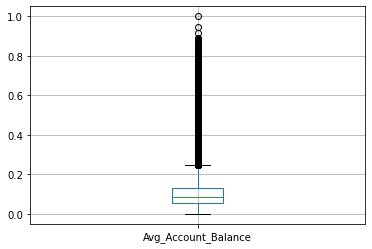

In [125]:
X_train.boxplot('Avg_Account_Balance')